# Step 1: Importing the necessary libraries

### This section, we import the necessary libraries for data manipulation, visualization, and preprocessing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset

### Loading dataset containing clinical and diagnostic features related to pediatric appendicitis. Also exploring the structure, checking data types, and get basic statistics to understand the range and shape of the data.

In [4]:
df = pd.read_csv(r"C:\Users\roger\Downloads\Integrative App\Rogensburg_Pediatric_Appendicities.csv")
print(df.head())

   Unnamed: 0    Age   BMI     Sex  Height  Weight  Length_of_Stay  \
0           0  12.68  16.9  female   148.0    37.0             3.0   
1           1  14.10  31.9    male   147.0    69.5             2.0   
2           2  14.14  23.3  female   163.0    62.0             4.0   
3           3  16.37  20.6  female   165.0    56.0             3.0   
4           4  11.08  16.9  female   163.0    45.0             3.0   

   Alvarado_Score  Paedriatic_Appendicitis_Score Appendix_on_US  ...  \
0             4.0                            3.0            yes  ...   
1             5.0                            4.0             no  ...   
2             5.0                            3.0             no  ...   
3             7.0                            6.0             no  ...   
4             5.0                            6.0            yes  ...   

   Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                    NaN                         NaN   NaN         NaN  

In [130]:
 df.dtypes

Unnamed: 0                             int64
Age                                  float64
BMI                                  float64
Sex                                 category
Height                               float64
Weight                               float64
Length_of_Stay                       float64
Alvarado_Score                       float64
Paedriatic_Appendicitis_Score        float64
Appendix_on_US                      category
Appendix_Diameter                    float64
Migratory_Pain                      category
Lower_Right_Abd_Pain                category
Contralateral_Rebound_Tenderness    category
Coughing_Pain                       category
Nausea                              category
Loss_of_Appetite                    category
Body_Temperature                     float64
WBC_Count                            float64
Neutrophil_Percentage                float64
Segmented_Neutrophils                float64
Neutrophilia                        category
RBC_Count 

# Step 3: Check for Missing & Impute Values Appropriately

### We assign proper data types and handle missing values. Categorical variables are filled using the mode, while numerical variables use the mean.

In [128]:
df.isnull().sum()

Unnamed: 0                          0
Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_U

In [7]:
categorical = [
    "Sex", "Appendix_on_US", "Migratory_Pain", "Lower_Right_Abd_Pain",
    "Contralateral_Rebound_Tenderness", "Coughing_Pain", "Nausea", "Loss_of_Appetite",
    "Neutrophilia", "Ketones_in_Urine", "RBC_in_Urine", "WBC_in_Urine", "Dysuria", "Stool",
    "Peritonitis", "Psoas_Sign", "Ipsilateral_Rebound_Tenderness", "US_Performed",
    "Free_Fluids", "Appendix_Wall_Layers", "Target_Sign", "Appendicolith", "Perfusion",
    "Perforation", "Surrounding_Tissue_Reaction", "Appendicular_Abscess", "Abscess_Location",
    "Pathological_Lymph_Nodes", "Lymph_Nodes_Location", "Bowel_Wall_Thickening",
    "Conglomerate_of_Bowel_Loops", "Ileus", "Coprostasis", "Meteorism", "Enteritis",
    "Gynecological_Findings", "Management", "Severity", "Diagnosis"
]
numerical = [
    "Unnamed: 0", "Age", "BMI", "Height", "Weight", "Length_of_Stay", "Alvarado_Score",
    "Paedriatic_Appendicitis_Score", "Appendix_Diameter", "Body_Temperature", "WBC_Count",
    "Neutrophil_Percentage", "Segmented_Neutrophils", "RBC_Count", "Hemoglobin", "RDW",
    "Thrombocyte_Count", "CRP", "US_Number"
]
# Convert to correct types
df[categorical] = df[categorical].astype('category')
df[numerical] = df[numerical].apply(pd.to_numeric, errors='coerce')

In [36]:
# Fill missing values for categorical columns with mode
for col in categorical:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])
# Fill missing values for numerical columns with mean
for col in numerical:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean(skipna=True))

df.isnull().sum()

Unnamed: 0                          0
Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_U

In [38]:
print(df.head())

   Unnamed: 0    Age   BMI     Sex  Height  Weight  Length_of_Stay  \
0           0  12.68  16.9  female   148.0    37.0             3.0   
1           1  14.10  31.9    male   147.0    69.5             2.0   
2           2  14.14  23.3  female   163.0    62.0             4.0   
3           3  16.37  20.6  female   165.0    56.0             3.0   
4           4  11.08  16.9  female   163.0    45.0             3.0   

   Alvarado_Score  Paedriatic_Appendicitis_Score Appendix_on_US  ...  \
0             4.0                            3.0            yes  ...   
1             5.0                            4.0             no  ...   
2             5.0                            3.0             no  ...   
3             7.0                            6.0             no  ...   
4             5.0                            6.0            yes  ...   

   Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                    yes                          no    no         yes  

# Step 4: Statistical Analysis

### Basic descriptive statistics give insight into the distribution, central tendencies, and spread of both numerical and categorical features.

In [40]:
df.describe()

,Unnamed: 0,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,782.000000,782.000000,782.000000,782.00000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,390.500000,11.346451,18.907012,148.01746,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900,425.515789
std,225.888247,3.527649,4.308862,19.40079,17.357550,2.567457,2.082962,1.892135,2.023563,0.899619,5.345871,13.476199,3.929691,0.493228,1.377122,4.462585,71.654101,57.027956,267.732743
min,0.000000,0.000000,7.830000,53.00000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,195.250000,9.210000,15.805000,138.00000,29.500000,3.000000,4.000000,4.000000,7.000000,36.800000,8.300000,63.825000,64.929630,4.540000,12.700000,12.300000,236.000000,1.000000,204.250000
50%,390.500000,11.440000,18.280000,149.00000,41.450000,3.000000,6.000000,5.000000,7.762651,37.200000,12.000000,71.900000,64.929630,4.790000,13.380497,12.800000,277.000000,7.000000,409.500000
75%,585.750000,14.080000,21.015000,162.22500,54.000000,5.000000,8.000000,6.000000,8.000000,37.900000,16.200000,82.375000,64.929630,5.010000,14.000000,13.300000,328.750000,32.000000,603.750000
max,781.000000,18.360000,38.160000,192.00000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


# Step 5: Check for Outliers

### Boxplots allow visual detection of outliers in numerical features that may impact the performance of machine learning models.

In [52]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical column names:", list(numerical_cols))

Number of numerical columns: 19
Numerical column names: ['Unnamed: 0', 'Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP', 'US_Number']


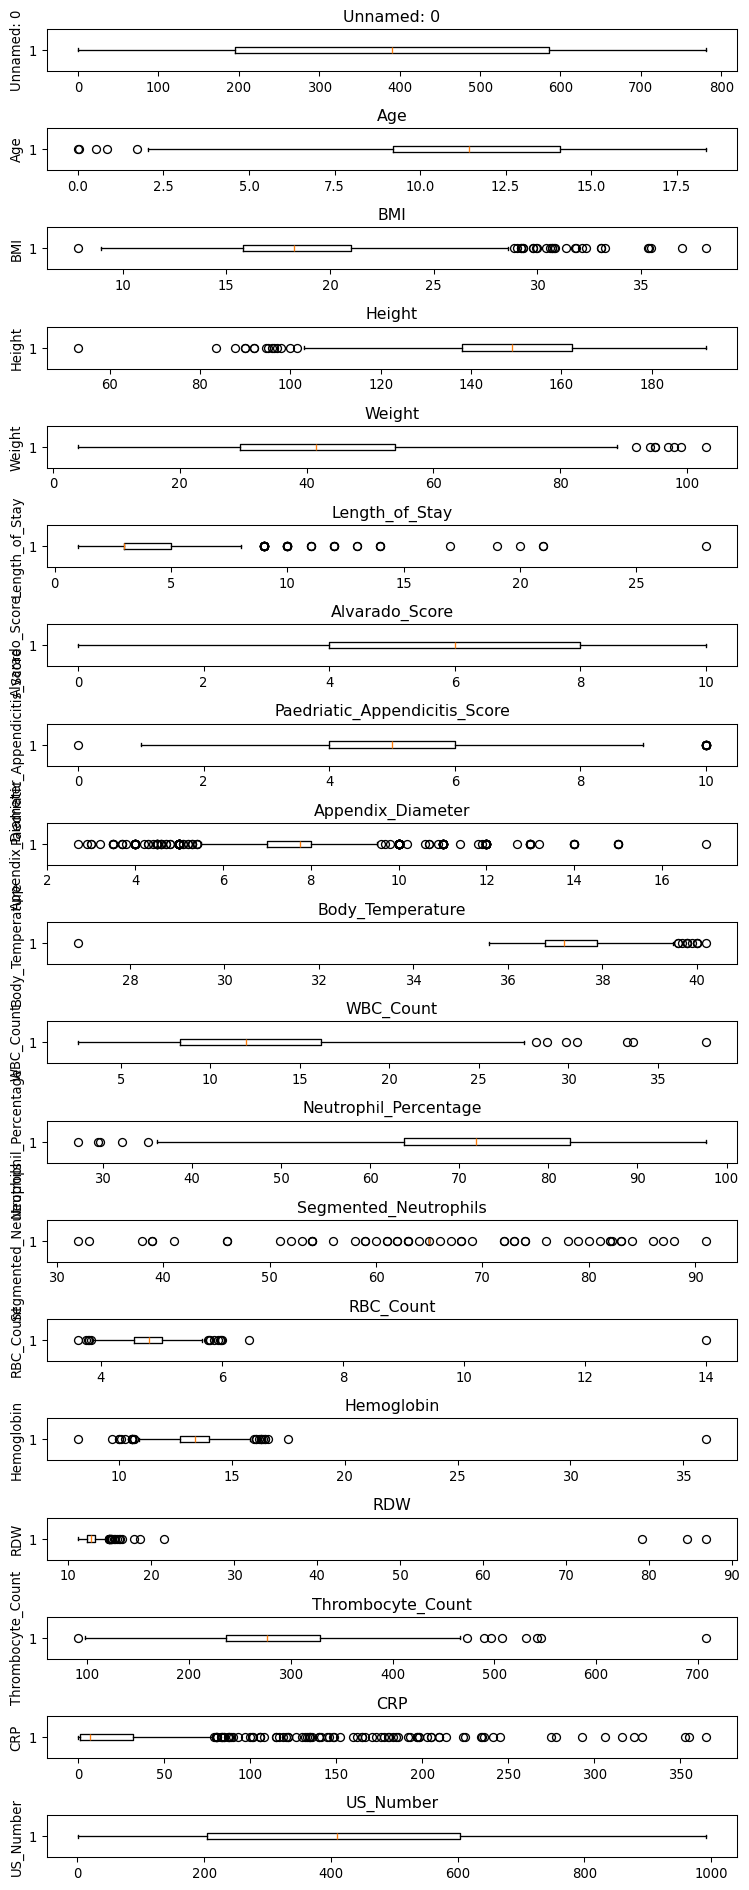

In [56]:
fig, axs = plt.subplots(19, 1, dpi=95, figsize=(8, 20))

# Loop through just the 9 selected columns
for i, col in enumerate(numerical):
    axs[i].boxplot(df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

In [75]:
# Identify the quartiles
q1, q3 = np.percentile(df['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Age'] >= lower_bound) 
				& (df['Age'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) 
						& (clean_data['BMI'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Height'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Height'] >= lower_bound) 
						& (clean_data['Height'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Weight'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Weight'] >= lower_bound) 
						& (clean_data['Weight'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Length_of_Stay'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Length_of_Stay'] >= lower_bound) 
						& (clean_data['Length_of_Stay'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Paedriatic_Appendicitis_Score'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Paedriatic_Appendicitis_Score'] >= lower_bound) 
						& (clean_data['Paedriatic_Appendicitis_Score'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Thrombocyte_Count'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Thrombocyte_Count'] >= lower_bound)
                        & (clean_data['Thrombocyte_Count'] <= upper_bound)]
df=clean_data

In [71]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Unnamed: 0                        612 non-null    int64   
 1   Age                               612 non-null    float64 
 2   BMI                               612 non-null    float64 
 3   Sex                               612 non-null    category
 4   Height                            612 non-null    float64 
 5   Weight                            612 non-null    float64 
 6   Length_of_Stay                    612 non-null    float64 
 7   Alvarado_Score                    612 non-null    float64 
 8   Paedriatic_Appendicitis_Score     612 non-null    float64 
 9   Appendix_on_US                    612 non-null    category
 10  Appendix_Diameter                 612 non-null    float64 
 11  Migratory_Pain                    612 non-null    category
 12 

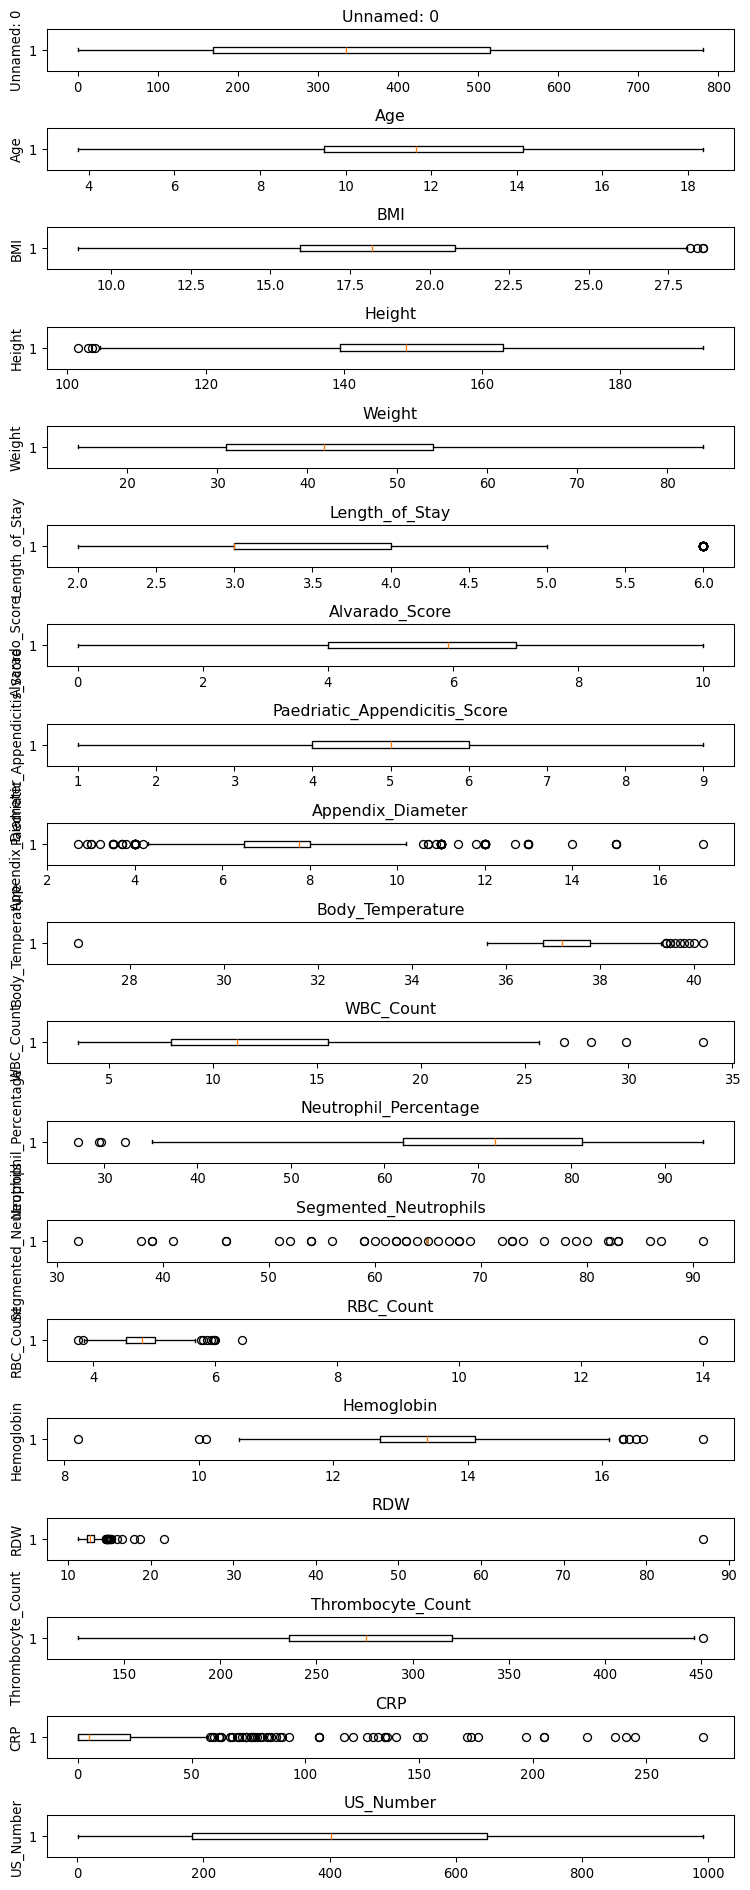

In [77]:
fig, axs = plt.subplots(19, 1, dpi=95, figsize=(8, 20))

# Loop through just the 9 selected columns
for i, col in enumerate(numerical):
    axs[i].boxplot(df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

# Step 6: Correlation

### Correlation matrix helps identify linear relationships between numerical variables. This is useful for feature selection and multicollinearity detection.

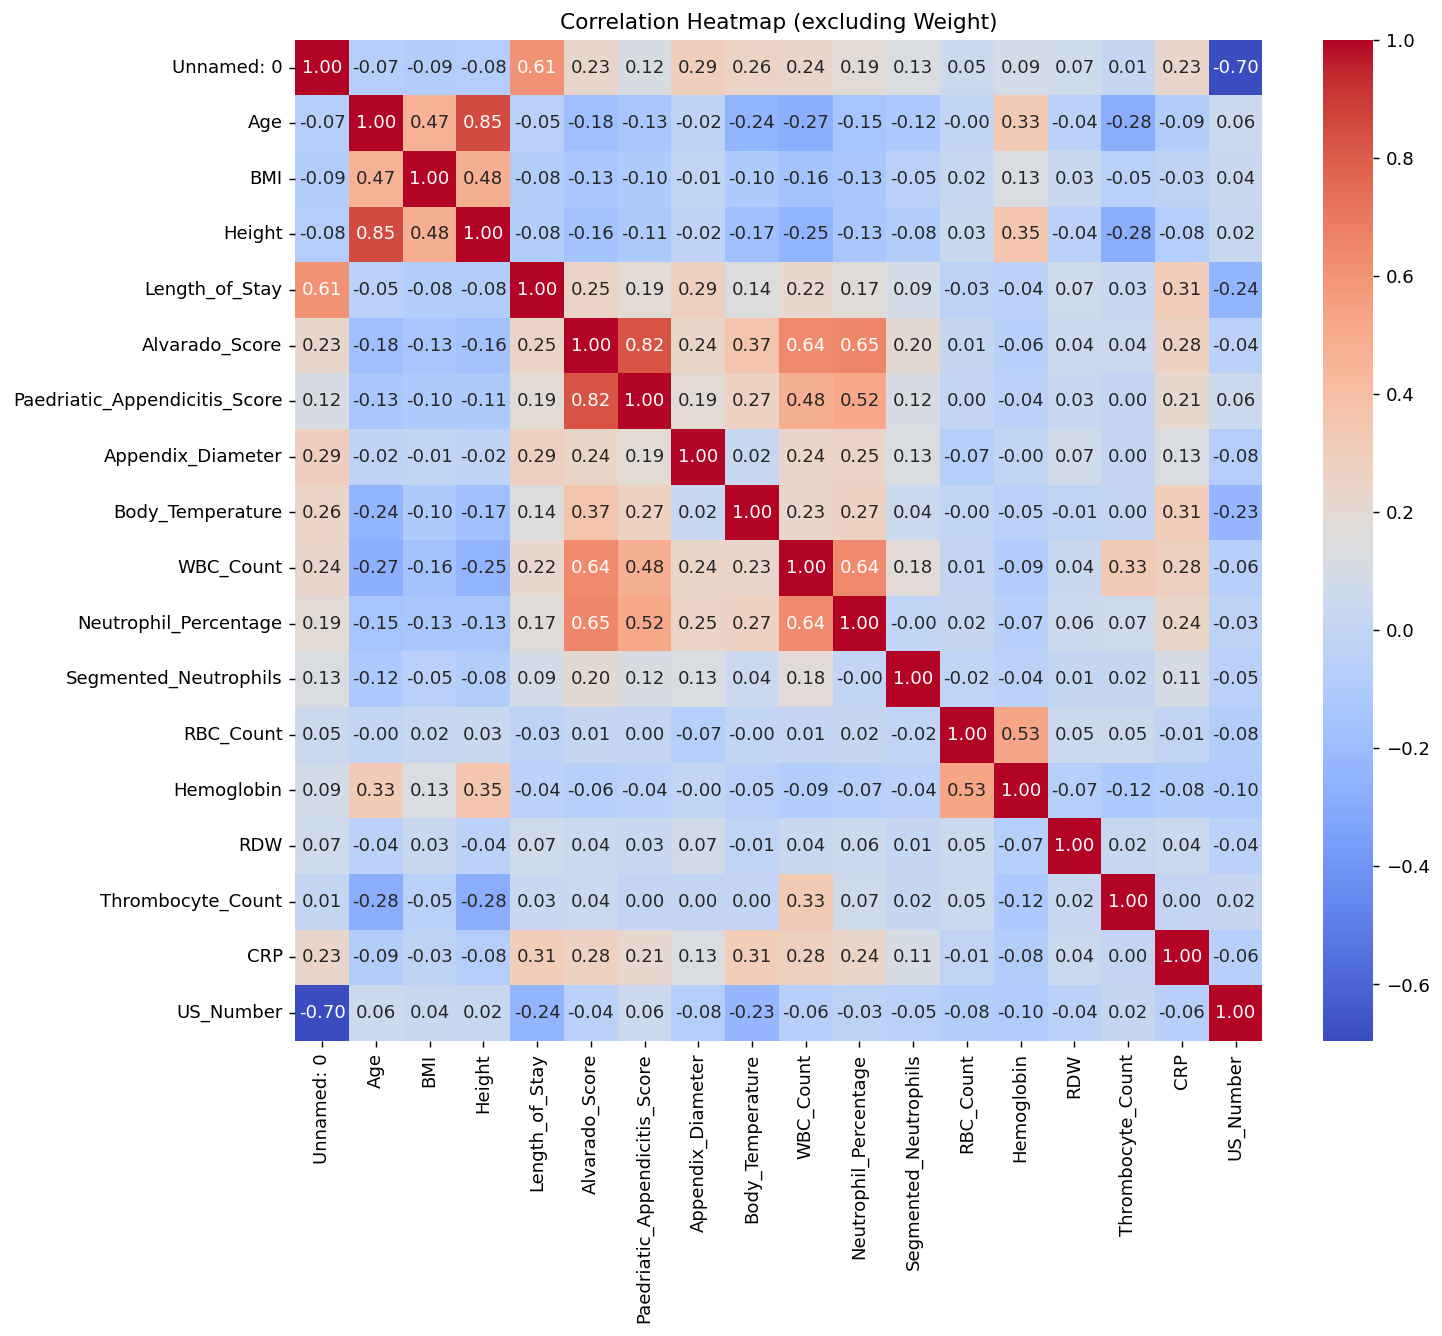

In [85]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Weight'])

# Compute correlation matrix
corr = numerical_df.corr()

# Plot heatmap
plt.figure(dpi=130, figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (excluding Weight)')
plt.show()

In [87]:
corr['BMI'].sort_values(ascending = False)

BMI                              1.000000
Height                           0.477229
Age                              0.467112
Hemoglobin                       0.130527
US_Number                        0.035324
RDW                              0.033554
RBC_Count                        0.021634
Appendix_Diameter               -0.009741
CRP                             -0.026900
Segmented_Neutrophils           -0.050375
Thrombocyte_Count               -0.053236
Length_of_Stay                  -0.079541
Unnamed: 0                      -0.085480
Paedriatic_Appendicitis_Score   -0.099502
Body_Temperature                -0.102840
Alvarado_Score                  -0.131283
Neutrophil_Percentage           -0.133477
WBC_Count                       -0.163376
Name: BMI, dtype: float64

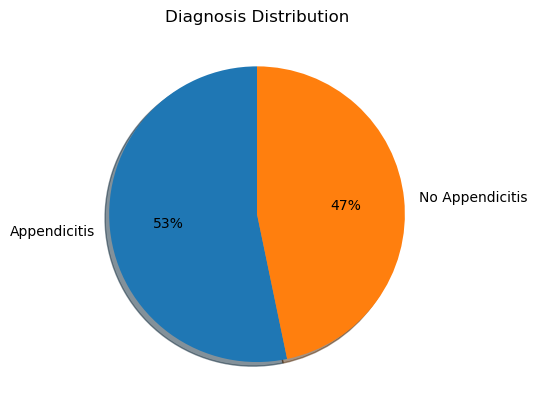

In [107]:
plt.pie(df.Diagnosis.value_counts(), 
		labels= ['Appendicitis', 'No Appendicitis'], 
		autopct='%.0f%%', shadow=True, startangle=90,)
plt.title('Diagnosis Distribution')
plt.show()

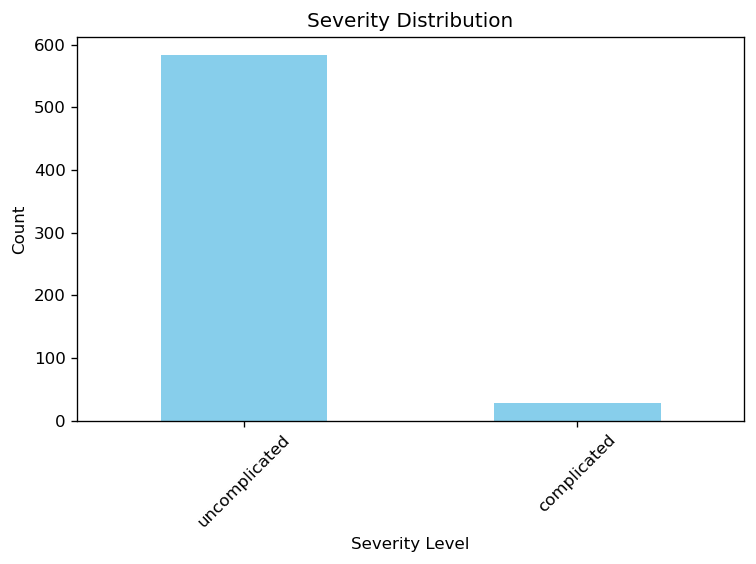

In [105]:
plt.figure(dpi=120)
df['Severity'].value_counts().plot.bar(color='skyblue')
plt.title('Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Separate Independent Features & Target Variables

### Separating the dataset into features (X) and target (y) for future modeling. The Diagnosis column is used as the predictive outcome.

In [111]:
X = df.drop(columns =['Diagnosis'])
Y = df.Diagnosis

In [113]:
X.head()

,Unnamed: 0,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Management,Severity
0,0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,...,reUB,yes,no,no,yes,yes,yes,keine,conservative,uncomplicated
2,2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,...,mesenterial,yes,no,no,yes,yes,yes,keine,conservative,uncomplicated
3,3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,...,reUB,yes,no,no,yes,yes,yes,keine,conservative,uncomplicated
4,4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,...,reUB,yes,no,no,yes,yes,yes,keine,conservative,uncomplicated
6,6,8.98,19.4,female,140.0,38.5,3.0,5.0,6.0,no,...,mesenterial,yes,no,no,yes,yes,yes,keine,conservative,uncomplicated


In [115]:
Y.head()

0       appendicitis
2    no appendicitis
3    no appendicitis
4       appendicitis
6    no appendicitis
Name: Diagnosis, dtype: category
Categories (2, object): ['appendicitis', 'no appendicitis']

# Step 8: Standardization

### Standardization ensures that all numerical features have a mean of 0 and standard deviation of 1, which is important for many machine learning algorithms.

In [119]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns from X
X_numerical = X.select_dtypes(include=['int64', 'float64'])

# Standardize
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X_numerical)

# Optional: Convert to DataFrame
rescaledX_df = pd.DataFrame(rescaledX, columns=X_numerical.columns)

# Preview
rescaledX_df.head()

,Unnamed: 0,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
0,-1.606184,0.323858,-0.488224,-0.077853,-0.395981,-0.450658,-0.824801,-1.135417,-0.235408,-0.355728,-0.876638,-0.187926,0.010085,0.872714,1.276674,-0.253062,-0.430444,-0.536682,1.588097
1,-1.597067,0.781492,1.343389,0.793771,1.280294,0.527879,-0.332681,-1.135417,0.101123,-0.806391,0.245994,0.296925,0.010085,-1.602310,-1.879544,-0.253062,0.306314,-0.455913,1.595127
2,-1.592508,1.480482,0.570678,0.909988,0.877988,-0.450658,0.651561,0.526111,0.101123,-1.482384,-0.121413,-0.569929,0.010085,-0.336019,0.162715,0.067996,-0.366378,-0.536682,1.602158
3,-1.587949,-0.177659,-0.488224,0.793771,0.140427,-0.450658,-0.332681,0.526111,-0.286193,-0.468394,-0.794992,-1.965710,0.010085,-0.719744,-0.765584,0.196420,0.482495,-0.536682,1.605673
4,-1.578832,-0.835900,0.227250,-0.542719,-0.295404,-0.450658,-0.332681,0.526111,0.101123,-0.693725,-0.407174,-0.121810,0.010085,-0.086598,-0.672754,-0.124639,0.898923,-0.294376,1.612703


In [145]:
df.to_csv("Capstone1_cleaned_dataset.csv", index=False)